## IRONHACK_ FINAL_PROJECT_11.03.2024 
## EMPLOYEE ATTRITION PREDICTION

### TASK UNDERSTANDING THE PROBLEM STATEMENT AND BUSINESS CASE

### TASK 
UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE 
Hiring and retaining employees is an expensive process that requires capital skills and time as well. 
On average companies spend around 15-20% of the employee's salary just to recruit a new candidate. 
So in this project what we're going to do is  to train a machine learning model to predict which employees are more likely to quit based on some given features such as their education level job satisfaction, performance rating, job involvement and work life balance as well.
Output feature ( Prediction)  is Attrition. 
Input parameters are all the other values, some of which are already listed above.

Legends: 
### Education: 1 = Below College, 2 = College , 3 = Bachelor ,  4 = Master, 5 = Doctor
### Job Involvement: 1 = Low, 2 = Medium,  3 = High, 4 = Very High
### Job Satisfaction: 1 =Low, 2 = Medium, 3 = High, 4 = Very High
### Environment Satisfaction: 1 = Low, 2 = Medium, 3 = High, 4 = Very High
### Performance Rating: 1 = Low, 2 = Good, 3 = Excellent, 4 = Outstanding
### Work Life Balance: 1 = Bad, 2 = Good, 3 = Better, 4 = Best



### TASK : IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install jupyterthemes

Note: you may need to restart the kernel to use updated packages.


In [3]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)


In [4]:
emp_attrition_df=pd.read_csv('employee_attrition.csv')
emp_attrition_df


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
## obtaining descriptive statistics ( describe() ) of the numerical data: count, mean,std,min,quartile, max 
emp_attrition_df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Observations: Only int and string data features. No feature with float. Furthermore, 26 numerical featured and 9 categorical
### Target value  'Attrition' has no missing value. 


In [6]:
emp_attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Performing Data Visualization


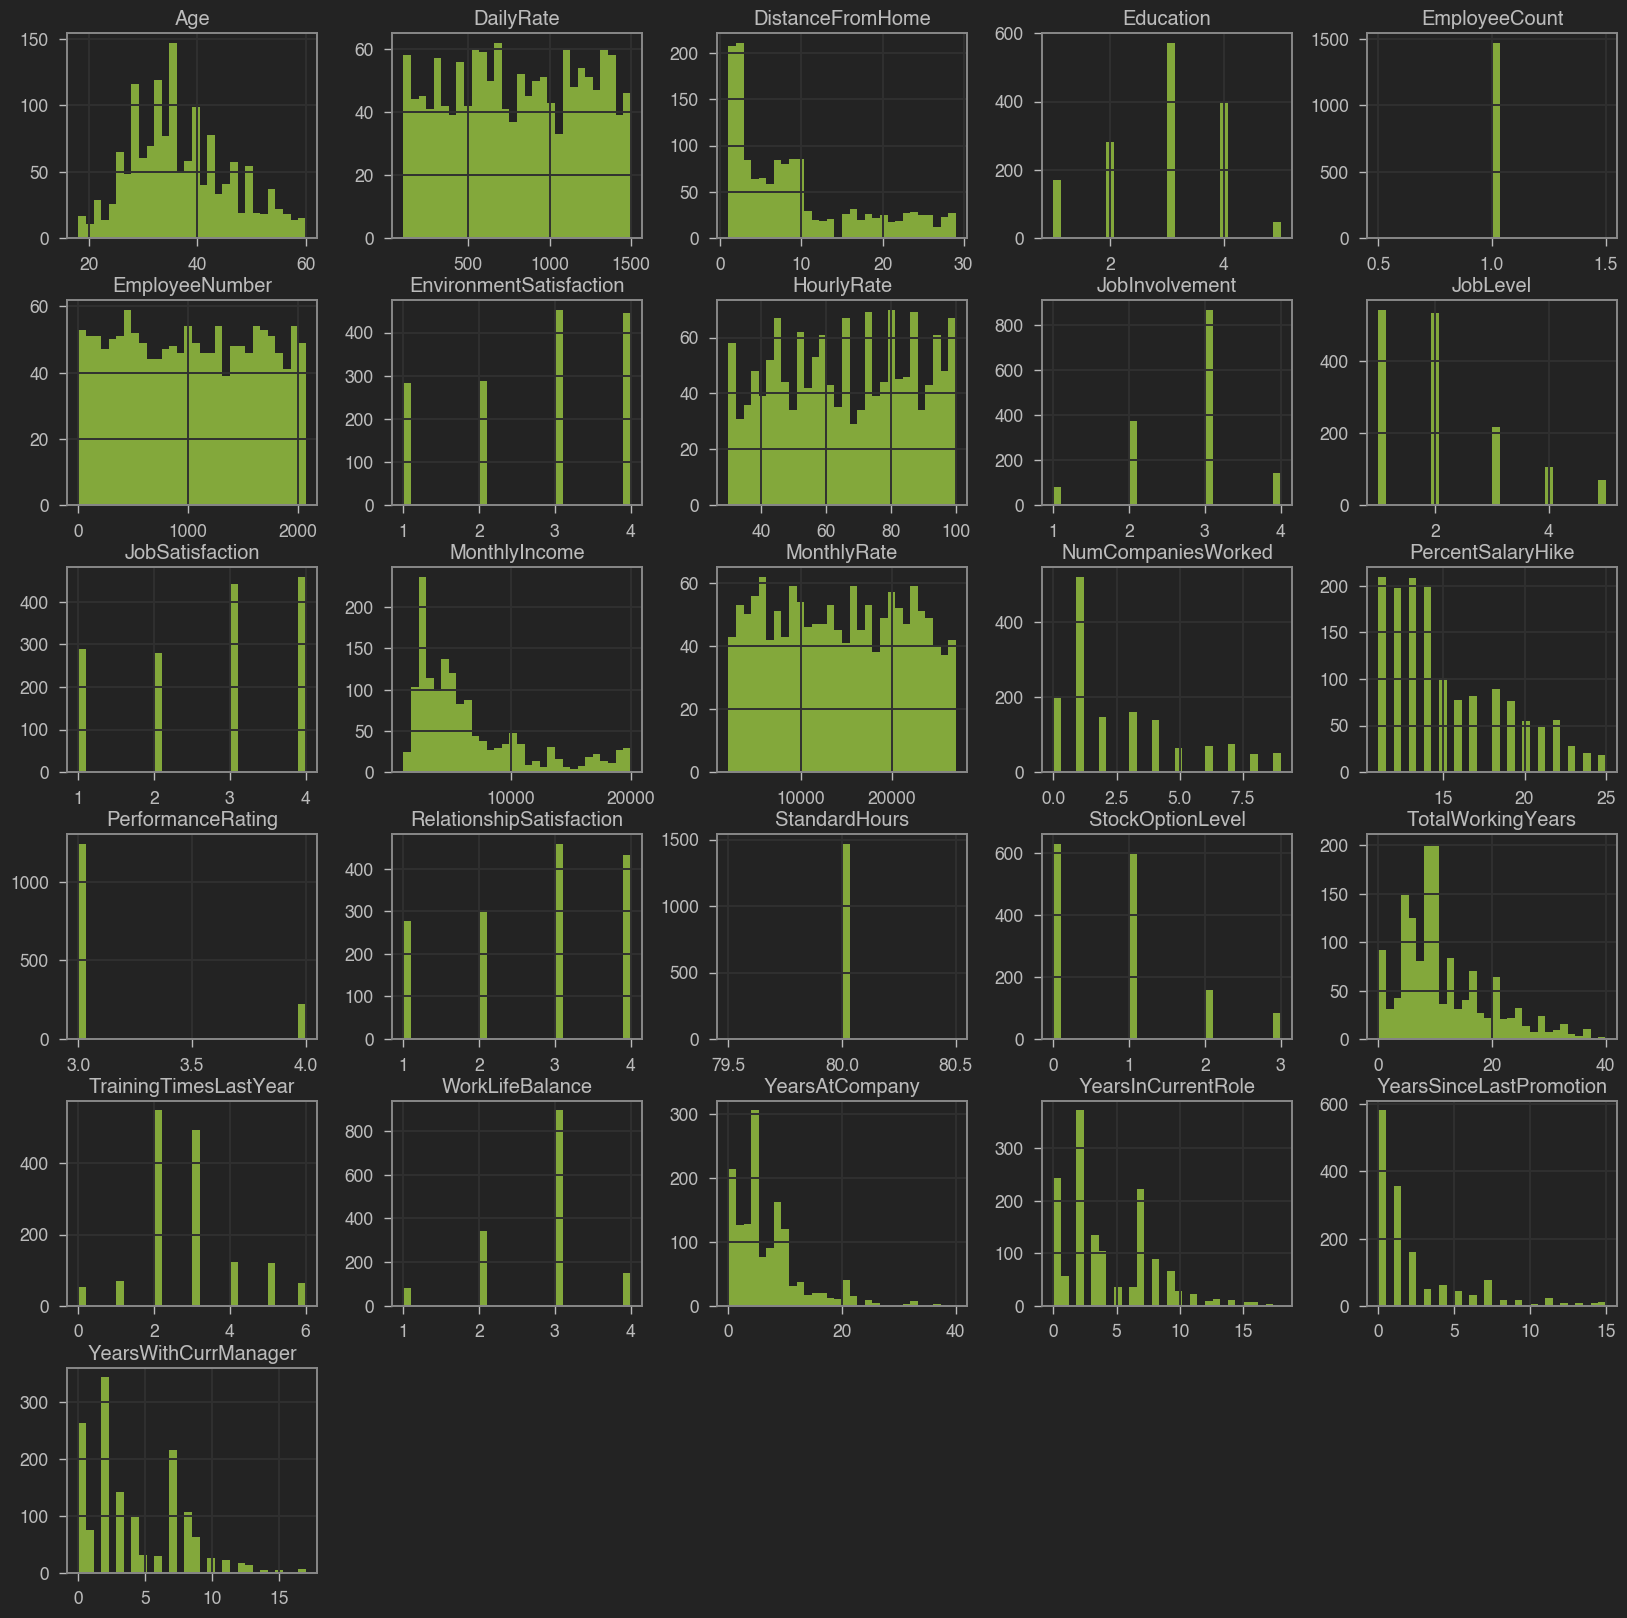

In [7]:
## creating histograms of the data with all variables
emp_attrition_df.hist(bins=30, figsize=(20,20), color='g');


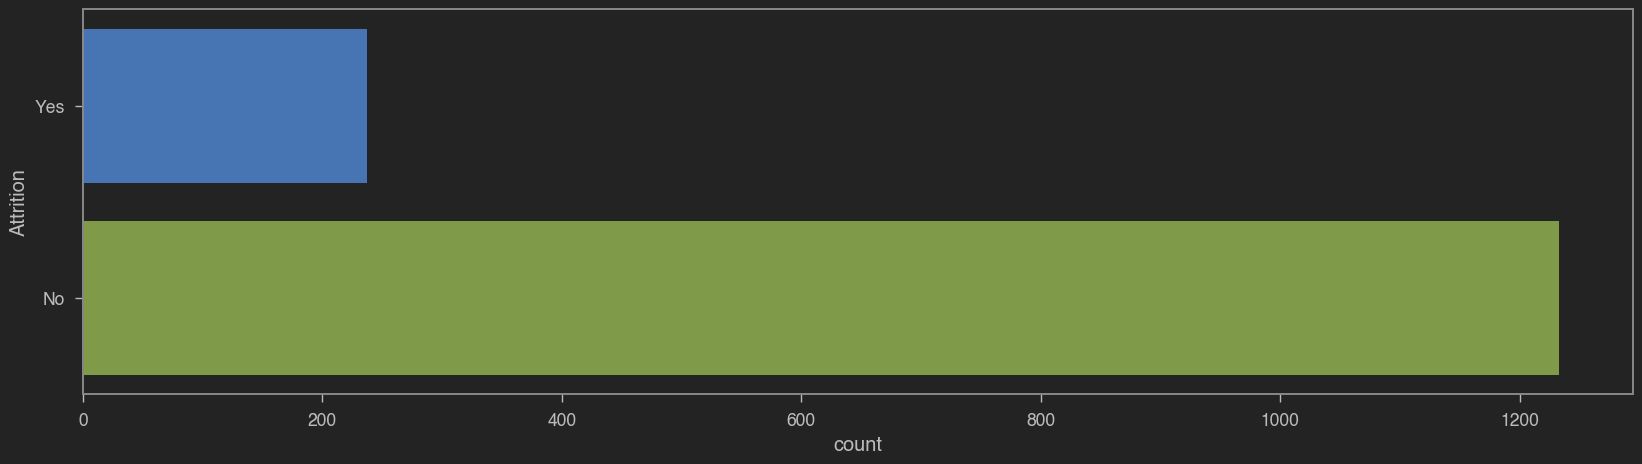

In [8]:
# plot showing how imbalanced the target value 'Attrition' is
plt.figure(figsize=(20,5))
plt.rc('font', size=14)
sns.countplot(y = 'Attrition', data =emp_attrition_df)
plt.show()

### Observation:  Data highly imbalanced since the employee who departed the company are less than those who stayed.


### Exploratory Data Analysis

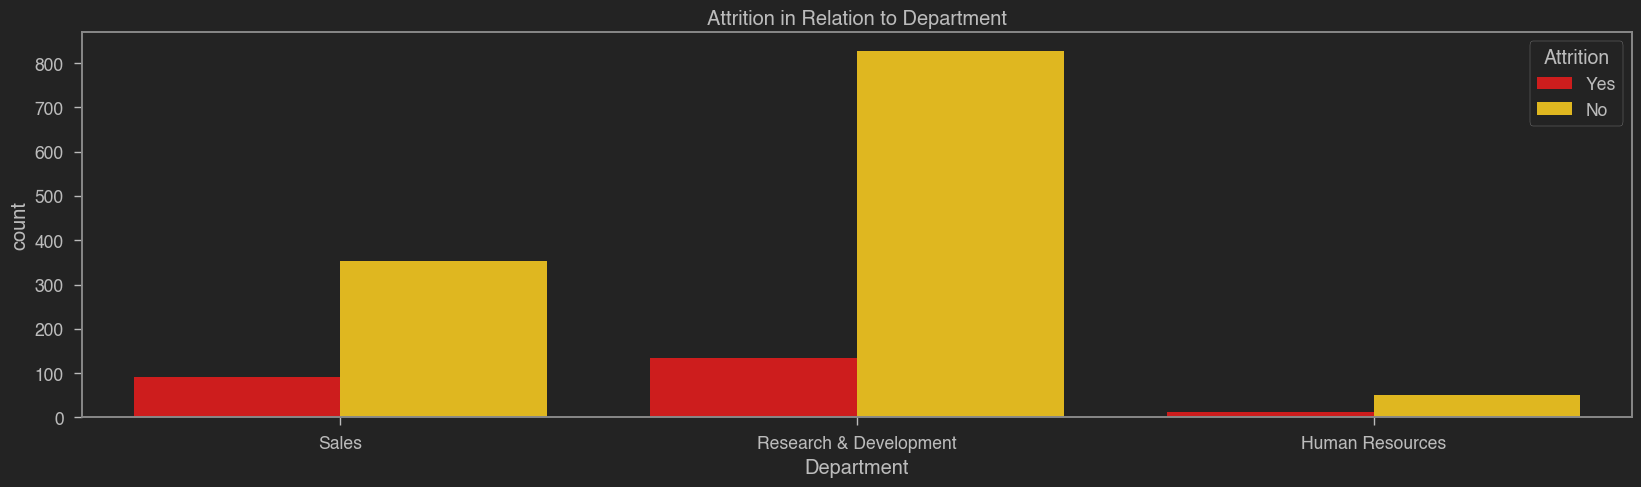

In [9]:
#  Building plots showing the relationship between target 'Attrition' and other variables:
# Attrition in relation to Department 
plt.figure(figsize=(20,5))
sns.countplot(x='Department', hue ='Attrition', data=emp_attrition_df, palette='hot')
plt.title('Attrition in Relation to Department')
plt.show()

In [10]:
#creation of an extra column named 'count' for the calculation of attrition rate
emp_attrition_df['count']=1
emp_attrition_df.groupby(['Department', 'Attrition']).agg({'count':'sum'})

count
Department             Attrition       
Human Resources        No            51
                       Yes           12
Research & Development No           828
                       Yes          133
Sales                  No           354
                       Yes           92

In [11]:
# Attrition rate in HR 
[12/(51+12),                #Attrition rate in HR is 19%

#Attrition rate in R&D
133 /(828 +133),           #Attrition rate in R&D is 14%

#Attrition rate in Sales
92/(354 +92) ]              #Attrition rate in Sales 21%


[0.19047619047619047, 0.1383975026014568, 0.2062780269058296]

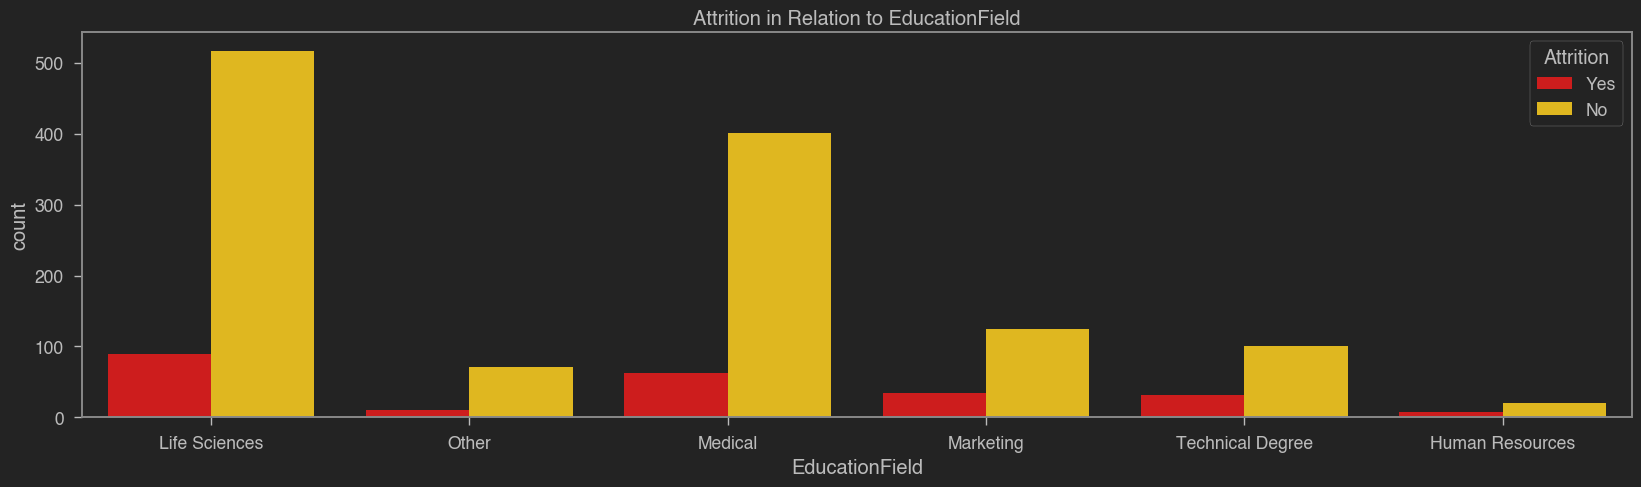

In [12]:
plt.figure(figsize=(20,5))
sns.countplot(x='EducationField', hue ='Attrition', data=emp_attrition_df, palette='hot')
plt.title('Attrition in Relation to EducationField')
plt.show()

In [13]:
emp_attrition_df['count']=1
emp_attrition_df.groupby(['EducationField', 'Attrition']).agg({'count':'sum'})

count
EducationField   Attrition       
Human Resources  No            20
                 Yes            7
Life Sciences    No           517
                 Yes           89
Marketing        No           124
                 Yes           35
Medical          No           401
                 Yes           63
Other            No            71
                 Yes           11
Technical Degree No           100
                 Yes           32

In [14]:
# calculating the Attrition rate in EducationField
[7/(20+7),      #Human Resources 26% 
 89/(517 +89),  #Life Sciences  15%
 35/(124+35),   #Marketing      22%
 63/(401+63),   #Medical       14%
 11/(71 +11),   #Other         13% 
 32/(100+32)]   #Technical Degree  24%

[0.25925925925925924,
 0.14686468646864687,
 0.22012578616352202,
 0.13577586206896552,
 0.13414634146341464,
 0.24242424242424243]

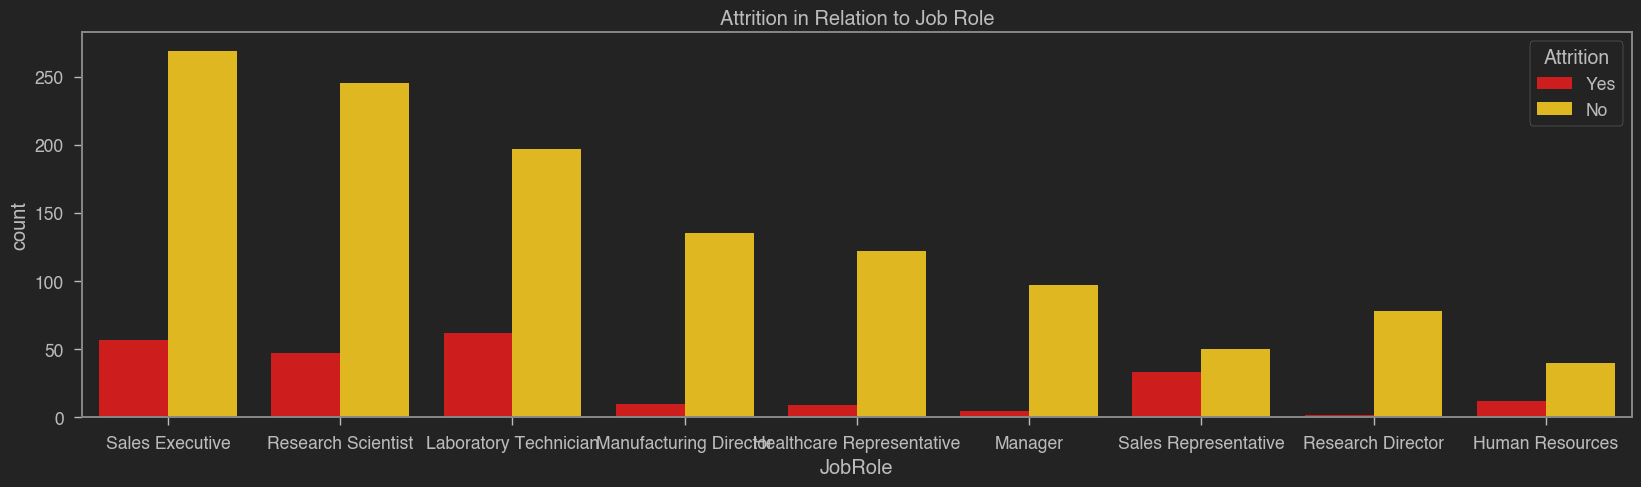

In [15]:
plt.figure(figsize=(20,5))
sns.countplot(x='JobRole', hue ='Attrition', data=emp_attrition_df, palette='hot')
plt.title('Attrition in Relation to Job Role')
plt.show()

In [16]:
#Attrition rate in relation to Job roles:

[ 9/(122+9),     #Health Care Representative  6%
 12/(40+12),     # HR                         23%
 62/(197+62),    # Lab. Technician            24%
 5/(97+5),       # Manager                    4%
 10 /(135 +10),  # Manufacturing Director     6%
 2/(78 +2),      #Research Director           2%
 47 / (245 +47), #Research Scientist          16%
 57 /(269+57),   # Sales Executive            17%
 33/(33+50)]     # Sales Representative       40%
 

[0.06870229007633588,
 0.23076923076923078,
 0.23938223938223938,
 0.049019607843137254,
 0.06896551724137931,
 0.025,
 0.16095890410958905,
 0.17484662576687116,
 0.39759036144578314]

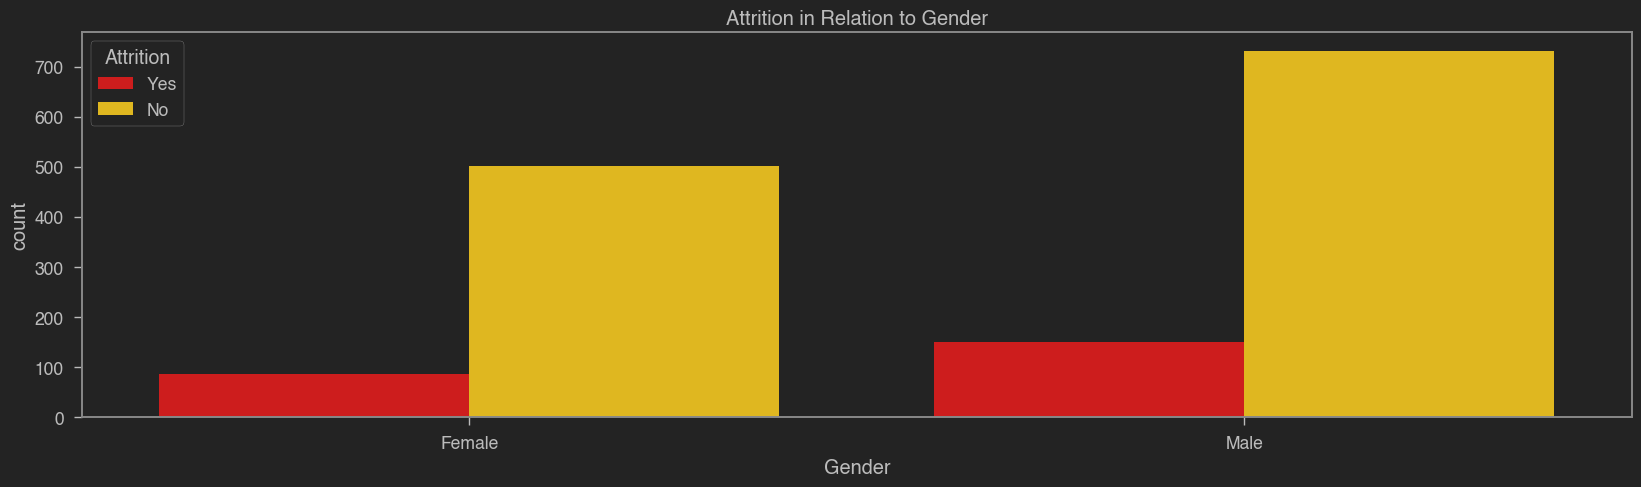

In [17]:
plt.figure(figsize=(20,5))
sns.countplot(x='Gender', hue ='Attrition', data=emp_attrition_df, palette='hot')
plt.title('Attrition in Relation to Gender')
plt.show()

In [18]:
emp_attrition_df['count']=1
emp_attrition_df.groupby(['Gender', 'Attrition']).agg({'count':'sum'})

count
Gender Attrition       
Female No           501
       Yes           87
Male   No           732
       Yes          150

In [19]:
#calculating the gender based attrition rate to get a better understanding of the numbers

[87/(501 +87),     # 15% Attrition rate female-related
 150/(732 +150)]   # 17% Attrition rate male-related


[0.14795918367346939, 0.17006802721088435]

In [20]:
emp_attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [21]:
print(emp_attrition_df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

ValueError: could not convert string to float: 'Yes'

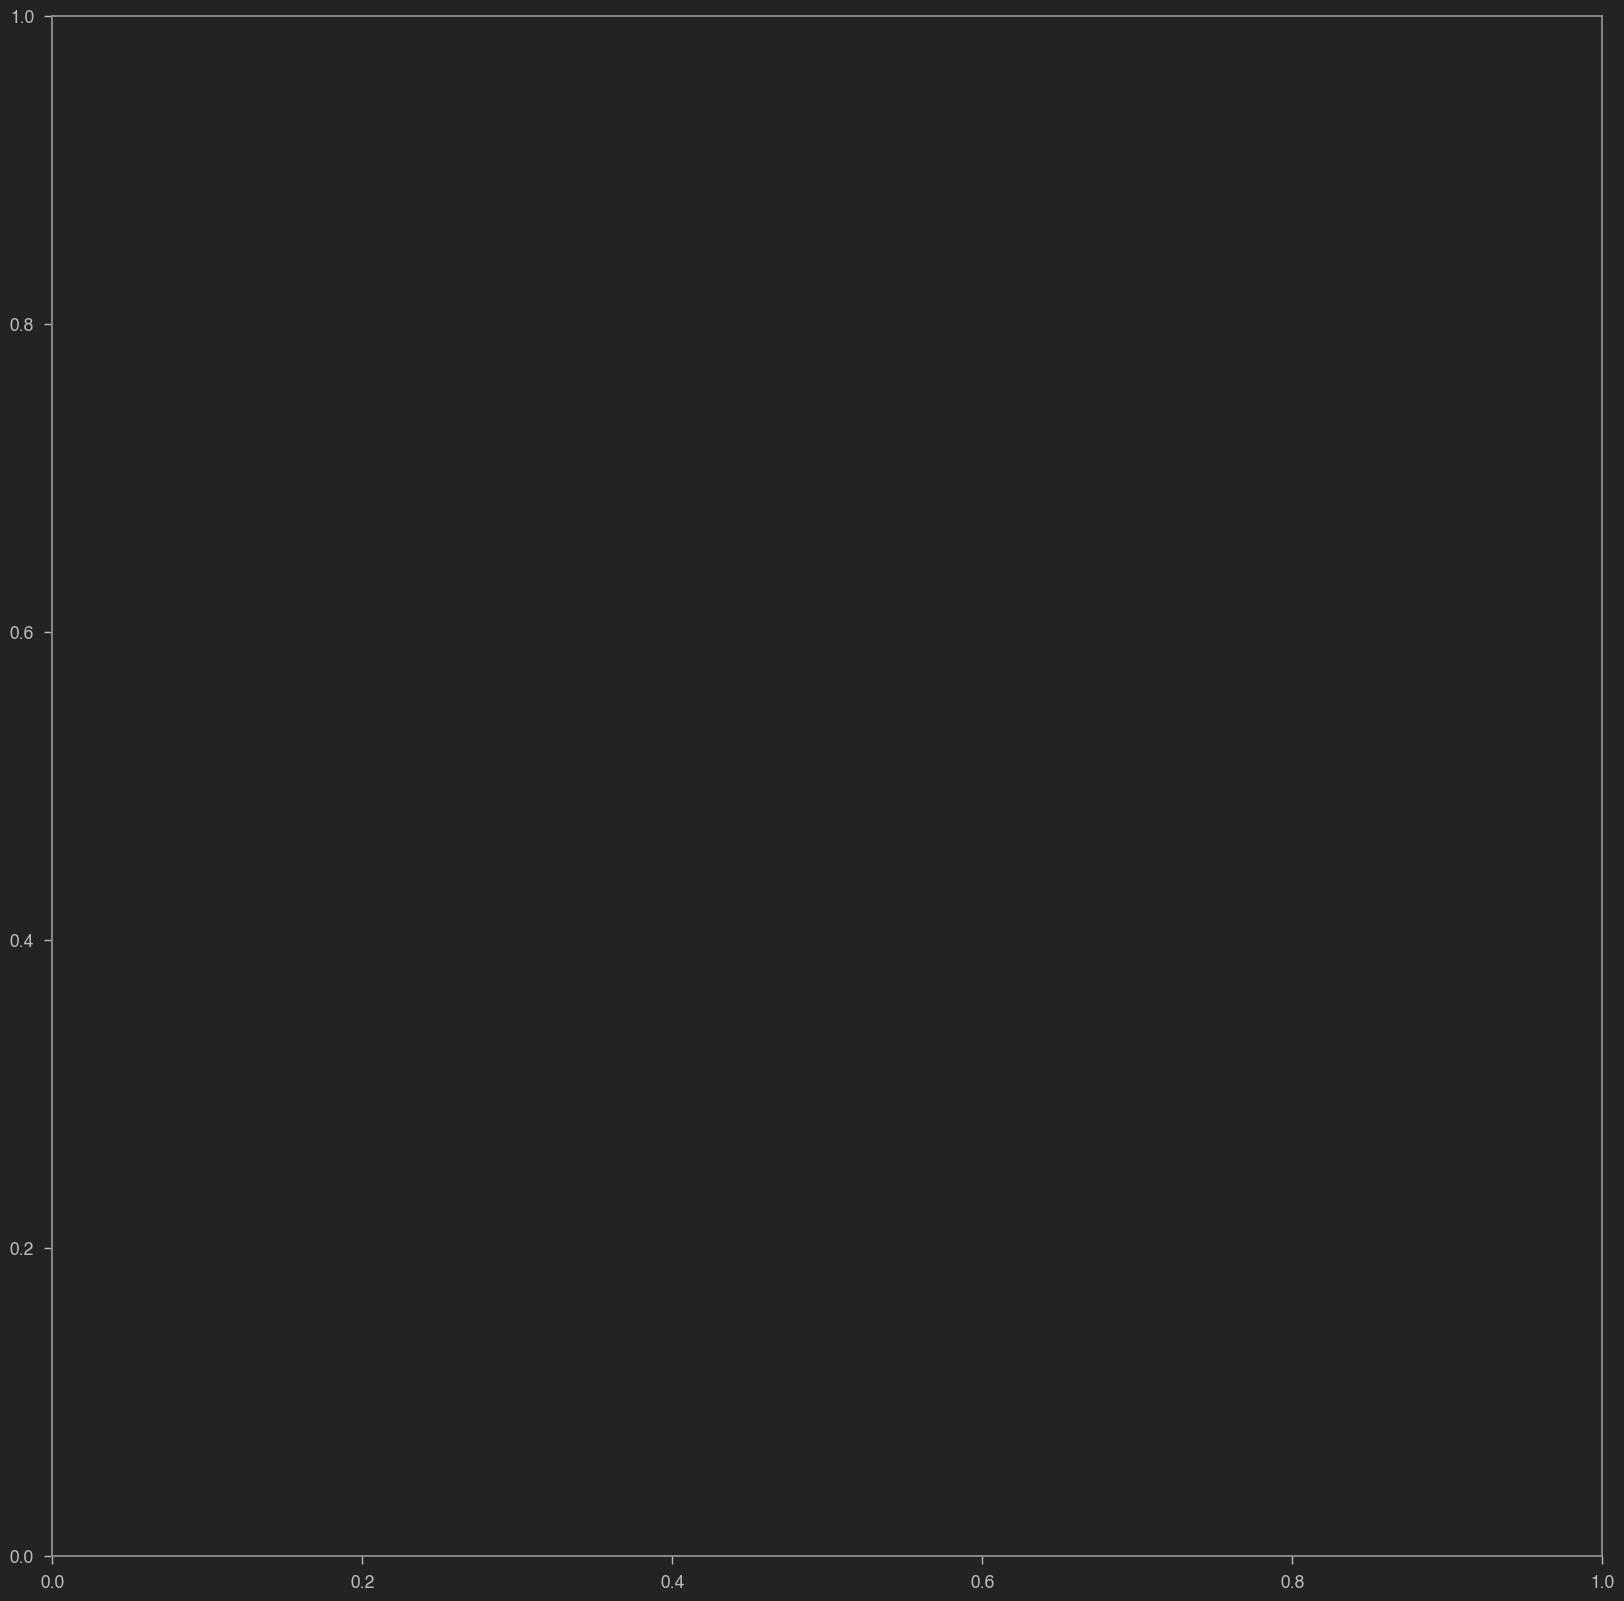

In [22]:
## using the correlation map to better understand the relationship between variables

import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(emp_attrition_df.corr(),annot=True,linewidth=.5,fmt='.1f')

### Observation: Slight difference in gender based attrition: Female: 15% and Male 17%
### High attrition rate with Sales Representatives
### The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
### The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
### The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.
### The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
### Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
### About 10% of leavers left when they reach their 2-year anniversary at the company.
### People who live further away from their work show higher proportion of leavers compared to their counterparts.
### People who travel frequently show higher proportion of leavers compared to their counterparts.
### People who have to work overtime show higher proportion of leavers compared to their counterparts.
### Employees that have already worked at several companies previously (already “bounced” between workplaces) show higher proportion of leavers compared to their counterparts.



In [25]:
#Preprocessing normalizing the data
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
emp_attrition_df = emp_attrition_df.drop(columns=['Attrition'])
norm = scaler.fit_transform(DF)
norm_df = pd.DataFrame(norm,columns=emp_attrition_df.columns)

KeyError: "['Attrition'] not found in axis"

### Task : Machine Learning : CREATE TESTING AND TRAINING DATASET

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline




In [ ]:
# Applying other evaluation metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_test are your true labels and predictions are your model's predictions
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print(f"Precision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nROC-AUC Score: {roc_auc}")

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{cm}")


In [23]:
# Visualization of the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming y_test are your true labels and predictions are your model's predictions
cm = confusion_matrix(y_test, predictions)

# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'y_test' is not defined

###  Observation: Model able to distinguish between classes but leans towards predictings negatives more accuratly than positives.  Further measures necesary

In [ ]:
# Resampling the data set ( Target variable 'Attrition') to adjust it's class distribution: Here Oversampling ( minority class)  method used
# Ideal for small data set like in this case
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus = RandomOverSampler(random_state=42)
X_over, y_over = rus.fit_resample(X,y)
print (Counter(y_over))


### Logistic Regression  here binomial Logistic Regeression since only 2 possible output possibilities

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Split the oversampled dataset
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

# Create a pipeline with scaling and logistic regression for the oversampled dataset
pipeline_over = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipeline_over.fit(X_train_over, y_train_over)

# Predictions
predictions_over = pipeline_over.predict(X_test_over)

# Evaluation
print(classification_report(y_test_over, predictions_over))


In [ ]:
# Using the Crossvalidation metrics
from sklearn.model_selection import cross_val_score

# Cross-validation on the oversampled data
scores_over = cross_val_score(pipeline_over, X_over, y_over, cv=5, scoring='accuracy')
print(f"Cross-validated scores on oversampled data: {scores_over}")
print(f"Average score: {scores_over.mean()}")


In [ ]:
# Using the hyperparameter metrics
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100]
}

grid_search_over = GridSearchCV(pipeline_over, param_grid, cv=5, scoring='accuracy')
grid_search_over.fit(X_train_over, y_train_over)

print("Best parameters:", grid_search_over.best_params_)
print("Best cross-validated score:", grid_search_over.best_score_)


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV


# Assuming predictions are made on a holdout test set
predictions = grid_search.best_estimator_.predict(X_test)

print(classification_report(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, predictions))
